# <h1 align = "center">分析影响 credit risk 的因素</h1>

<h1 align = "center"><font size=3>余俊哲 2021016607 会计21-3班</font></h1>

In [1]:
import pandas as pd
import numpy as np
import researchpy as rp
import matplotlib.pyplot as plt
import seaborn as sns

# 导入数据
df = pd.read_csv(r"E:\\yanghu\\HW3\\credit risk.csv",encoding="UTF-8")

np.round(df.describe(),4)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 12 columns):
Loan Purpose       425 non-null object
Checking           425 non-null int64
Savings            425 non-null int64
Months Customer    425 non-null int64
Months Employed    425 non-null int64
Gender             425 non-null object
Marital Status     425 non-null object
Age                425 non-null int64
Housing            425 non-null object
Years              425 non-null int64
Job                425 non-null object
Credit Risk        425 non-null object
dtypes: int64(6), object(6)
memory usage: 39.9+ KB


#  数据可视化与分析

## 分类型变量

In [2]:
df["Loan Purpose"].value_counts()

Small Appliance    105
New Car            104
Furniture           85
Business            44
Used Car            40
Education           23
Repairs             12
Other                6
Large Appliance      4
Retraining           2
Name: Loan Purpose, dtype: int64

<BarContainer object of 10 artists>

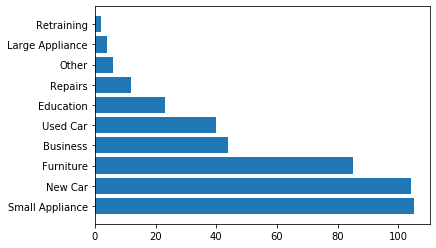

In [3]:
plt.barh(df["Loan Purpose"].value_counts().index,df["Loan Purpose"].value_counts())

In [4]:
df["Loan Purpose"].value_counts()/len(df["Loan Purpose"])*100

Small Appliance    24.705882
New Car            24.470588
Furniture          20.000000
Business           10.352941
Used Car            9.411765
Education           5.411765
Repairs             2.823529
Other               1.411765
Large Appliance     0.941176
Retraining          0.470588
Name: Loan Purpose, dtype: float64

([<matplotlib.patches.Wedge at 0x1f983895978>,
 [Text(2.0409250405141637, 2.003553088640843, 'Small Appliance'),
  Text(-1.9500858037343207, 2.092072025068418, 'New Car'),
  Text(-2.3976377996810383, -1.5591449520620813, 'Furniture'),
  Text(-0.11624377143362308, -2.8576366783765375, 'Business'),
  Text(1.5679959195253672, -2.3918588579495657, 'Used Car'),
  Text(2.4750690611748096, -1.4330502930515905, 'Education'),
  Text(2.7593303778857274, -0.7521275594452106, 'Repairs'),
  Text(2.834720879654905, -0.3794173618174628, 'Other'),
  Text(2.855000679320763, -0.1690299413653745, 'Large Appliance'),
  Text(2.859687457727163, -0.042280540653555396, 'Retraining')],
 [Text(1.1132318402804529, 1.0928471392586414, '24.71%'),
  Text(-1.0636831656732657, 1.1411301954918642, '24.47%'),
  Text(-1.3078024361896572, -0.8504427011247715, '20.00%'),
  Text(-0.06340569350924895, -1.5587109154781111, '10.35%'),
  Text(0.8552705015592911, -1.3046502861543083, '9.41%'),
  Text(1.3500376697317142, -0.7816

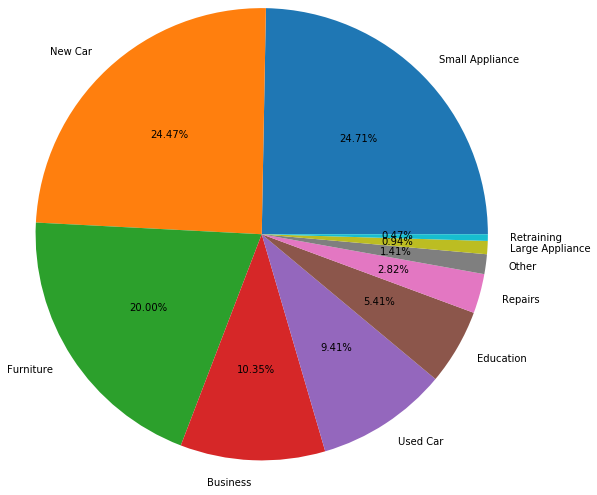

In [5]:
labels=['Small Appliance','New Car','Furniture','Business','Used Car','Education','Repairs','Other','Large Appliance','Retraining']
plt.pie(df["Loan Purpose"].value_counts(),labels=labels, radius=2.6,autopct='%.2f%%')

贷款目的（Loan Purpose）有Small Appliance、New Car、Furniture、Business、Used Car、Education、Repairs、Other、Large Appliance、Retraining。最多的是Small Appliance，有105人，占比约为24.71%；最少的是Retraining，有2人，占比约为0.47%。  

In [6]:
df["Gender"].value_counts()

M    290
F    135
Name: Gender, dtype: int64

<BarContainer object of 2 artists>

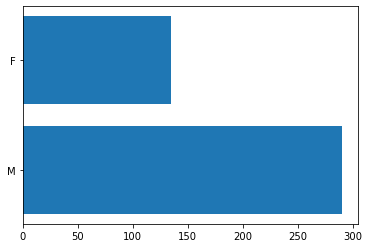

In [7]:
plt.barh(df["Gender"].value_counts().index,df["Gender"].value_counts())

In [8]:
df["Gender"].value_counts()/len(df["Gender"])*100

M    68.235294
F    31.764706
Name: Gender, dtype: float64

([<matplotlib.patches.Wedge at 0x1f983aa39e8>,
 [Text(-0.5962587471022134, 0.9243784433358986, 'M'),
  Text(0.5962588336487666, -0.9243783875101217, 'F')],
 [Text(-0.3252320438739345, 0.5042064236377628, '68.24%'),
  Text(0.32523209108114537, -0.5042063931873391, '31.76%')])

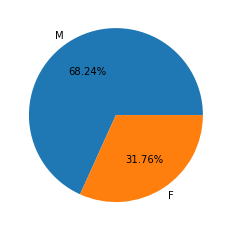

In [9]:
plt.pie(df["Gender"].value_counts(),labels=['M','F'],autopct='%.2f%%')

性别（Gender）有M（男性）和F（女性）。最多的是M（男性），有290人，占比约为68.24%；最少的是F（女性），有135人，占比约为31.76%。  

In [10]:
df["Marital Status"].value_counts()

Single      233
Divorced    156
Married      36
Name: Marital Status, dtype: int64

<BarContainer object of 3 artists>

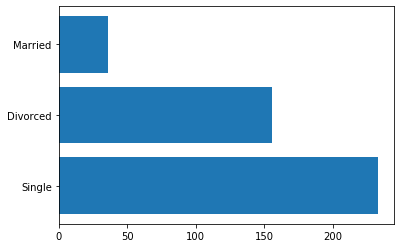

In [11]:
plt.barh(df["Marital Status"].value_counts().index,df["Marital Status"].value_counts())

In [12]:
df["Marital Status"].value_counts()/len(df["Marital Status"])*100

Single      54.823529
Divorced    36.705882
Married      8.470588
Name: Marital Status, dtype: float64

([<matplotlib.patches.Wedge at 0x1f983b44320>,
 [Text(-0.16605200397975126, 1.0873944693506163, 'Single'),
  Text(-0.12575774678532603, -1.0927877145738225, 'Divorced'),
  Text(1.0612808942581817, -0.28927990507906753, 'Married')],
 [Text(-0.0905738203525916, 0.5931242560094271, '54.82%'),
  Text(-0.06859513461017783, -0.5960660261311758, '36.71%'),
  Text(0.5788804877771899, -0.1577890391340368, '8.47%')])

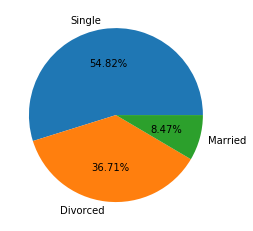

In [13]:
plt.pie(df["Marital Status"].value_counts(),labels=['Single','Divorced','Married'],autopct='%.2f%%')

婚姻状况（Marital Status）有Single、Divorced、Married。最多的是Single，有233人，占比约为54.82%；最少的是Married，有36人，占比约为8.47%。

In [14]:
df["Housing"].value_counts()

Own      292
Rent      81
Other     52
Name: Housing, dtype: int64

<BarContainer object of 3 artists>

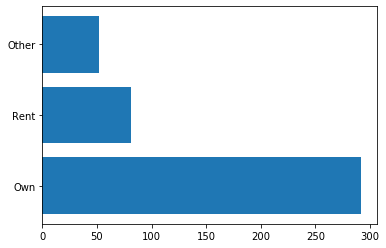

In [15]:
plt.barh(df["Housing"].value_counts().index,df["Housing"].value_counts())

In [16]:
df["Housing"].value_counts()/len(df["Housing"])*100

Own      68.705882
Rent     19.058824
Other    12.235294
Name: Housing, dtype: float64

([<matplotlib.patches.Wedge at 0x1f983bed390>,
 [Text(-0.6098589649285053, 0.9154627479566453, 'Own'),
  Text(0.22207053615023709, -1.077350767843949, 'Rent'),
  Text(1.0197328913822437, -0.41248615762617924, 'Other')],
 [Text(-0.3326503445064574, 0.499343317067261, '68.71%'),
  Text(0.12112938335467476, -0.5876458733694266, '19.06%'),
  Text(0.556217940753951, -0.22499244961427955, '12.24%')])

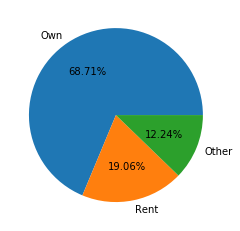

In [17]:
plt.pie(df["Housing"].value_counts(),labels=['Own','Rent','Other'],autopct='%.2f%%')

住房（Housing）有Own、Rent、Other。最多的是Own，有292人，占比约为68.71%；最少的是Other，有52人，占比约为12.24%。

In [18]:
df["Job"].value_counts()

Skilled       271
Unskilled      89
Management     54
Unemployed     11
Name: Job, dtype: int64

<BarContainer object of 4 artists>

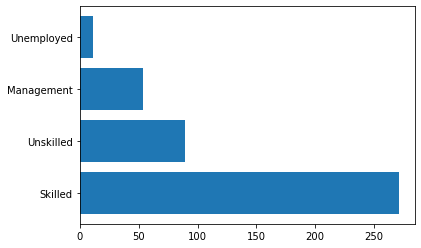

In [19]:
plt.barh(df["Job"].value_counts().index,df["Job"].value_counts())

In [20]:
df["Job"].value_counts()/len(df["Job"])*100

Skilled       63.764706
Unskilled     20.941176
Management    12.705882
Unemployed     2.588235
Name: Job, dtype: float64

([<matplotlib.patches.Wedge at 0x1f983c98908>,
 [Text(-0.46098709756039663, 0.9987446600021658, 'Skilled'),
  Text(-0.05283250425720773, -1.0987305067640165, 'Unskilled'),
  Text(0.9309327372062803, -0.5859728993713129, 'Management'),
  Text(1.0963656029417739, -0.0893446399406286, 'Unemployed')],
 [Text(-0.25144750776021635, 0.5447698145466358, '63.76%'),
  Text(-0.028817729594840573, -0.5993075491440089, '20.94%'),
  Text(0.5077814930216075, -0.3196215814752616, '12.71%'),
  Text(0.5980176016046039, -0.048733439967615595, '2.59%')])

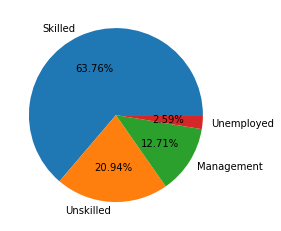

In [21]:
plt.pie(df["Job"].value_counts(),labels=['Skilled','Unskilled','Management','Unemployed'],autopct='%.2f%%')

工作（Job）有Skilled、Unskilled、Management、Unemployed。最多的是Skilled，有271人，占比约为63.76%；最少的是Unemployed，有11人，占比约为2.59%。

In [22]:
df["Credit Risk"].value_counts()

Low     214
High    211
Name: Credit Risk, dtype: int64

<BarContainer object of 2 artists>

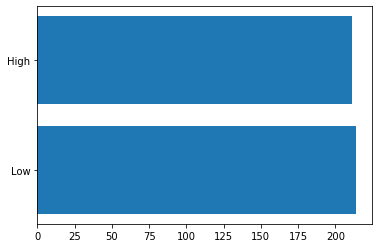

In [23]:
plt.barh(df["Credit Risk"].value_counts().index,df["Credit Risk"].value_counts())

In [24]:
df["Credit Risk"].value_counts()/len(df["Credit Risk"])*100

Low     50.352941
High    49.647059
Name: Credit Risk, dtype: float64

([<matplotlib.patches.Wedge at 0x1f983d42f60>,
 [Text(-0.012196582624811006, 1.09993238127272, 'Low'),
  Text(0.012196685607912856, -1.0999323801307888, 'High')],
 [Text(-0.006652681431715093, 0.5999631170578472, '50.35%'),
  Text(0.006652737604316102, -0.5999631164349756, '49.65%')])

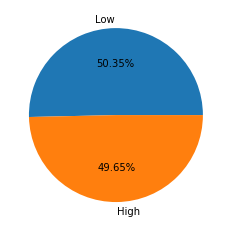

In [25]:
plt.pie(df["Credit Risk"].value_counts(),labels=['Low','High'],autopct='%.2f%%')

信用风险（Credit Risk）有Low、High。最多的是Low，有214人，占比约为50.35%；最少的是High，有211人，占比约为49.65%。

## 数值型变量



skew=4.1610071105941495
kurtosis=17.832994351312074


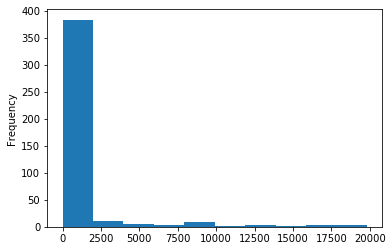

In [26]:
rp.summary_cont(df['Checking'])
skew=df['Checking'].skew()
print(f'skew={skew}')
kurtosis=df['Checking'].kurtosis()
print(f'kurtosis={kurtosis}')
df['Checking'].plot.hist()

Checking的均值为1048.0141，标准差为3147.1835，标准误为152.6608，95%置信区间为[747.9479,1348.0804]，偏度为4.1610071105941495，峰度为17.832994351312074。由于偏度系数大于0，说明数据存在右偏分布；峰度系数大于0，说明数据较为集中。



skew=3.032593683497407
kurtosis=8.937463585276333


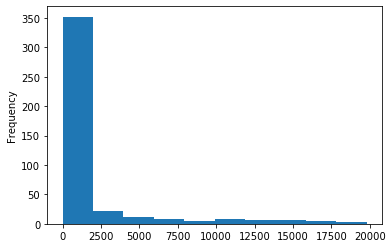

In [27]:
rp.summary_cont(df['Savings'])
skew=df['Savings'].skew()
print(f'skew={skew}')
kurtosis=df['Savings'].kurtosis()
print(f'kurtosis={kurtosis}')
df['Savings'].plot.hist()

Savings的均值为1812.5624，标准差为3597.285，标准误为174.494，95%置信区间为[1469.5815，2155.5433]，偏度为3.032593683497407，峰度为8.937463585276333。由于偏度系数大于0，说明数据存在右偏分布；峰度系数大于0，说明数据较为集中。



skew=0.9390916407003154
kurtosis=0.4724334565250361


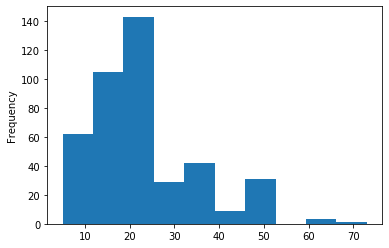

In [28]:
rp.summary_cont(df['Months Customer'])
skew=df['Months Customer'].skew()
print(f'skew={skew}')
kurtosis=df['Months Customer'].kurtosis()
print(f'kurtosis={kurtosis}')
df['Months Customer'].plot.hist()

Months Customer的均值为22.8965，标准差为12.2676，标准误为0.5951，95%置信区间为[21.7268，24.0661]，偏度为0.9390916407003154，峰度为0.4724334565250361。由于偏度系数大于0，说明数据存在右偏分布；峰度系数大于0，说明数据较为集中。



skew=1.1273259492720364
kurtosis=0.18341185840481344


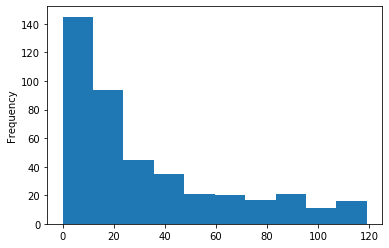

In [29]:
rp.summary_cont(df['Months Employed'])
skew=df['Months Employed'].skew()
print(f'skew={skew}')
kurtosis=df['Months Employed'].kurtosis()
print(f'kurtosis={kurtosis}')
df['Months Employed'].plot.hist()

Months Employed的均值为31.8965，标准差为32.2593，标准误为1.5648，95%置信区间为[28.8207，34.9722]，偏度为1.1273259492720364，峰度为0.18341185840481344。由于偏度系数大于0，说明数据存在右偏分布；峰度系数大于0，说明数据较为集中。



skew=0.9678156838825341
kurtosis=0.43878050063165785


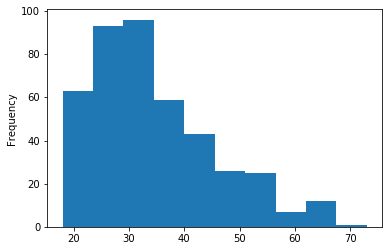

In [30]:
rp.summary_cont(df['Age'])
skew=df['Age'].skew()
print(f'skew={skew}')
kurtosis=df['Age'].kurtosis()
print(f'kurtosis={kurtosis}')
df['Age'].plot.hist()

Age的均值为34.3976，标准差为11.0451，标准误为0.5358，95%置信区间为[33.3446，35.4507]，偏度为0.9678156838825341，峰度为0.43878050063165785。由于偏度系数大于0，说明数据存在右偏分布；峰度系数大于0，说明数据较为集中。



skew=-0.26505800832587145
kurtosis=-1.34521386807028


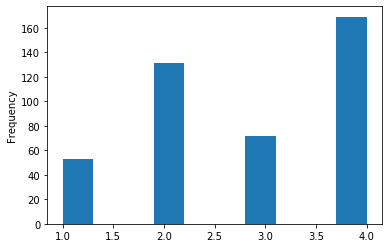

In [31]:
rp.summary_cont(df['Years'])
skew=df['Years'].skew()
print(f'skew={skew}')
kurtosis=df['Years'].kurtosis()
print(f'kurtosis={kurtosis}')
df['Years'].plot.hist()

Years的均值为2.84，标准差为1.0871，标准误为0.0527，95%置信区间为[2.7363，2.9437]，偏度为-0.26505800832587145，峰度为-1.34521386807028。由于偏度系数小于0，说明数据存在左偏分布；峰度系数小于0，说明数据较为分散。

# 相关性度量

## 列联表分析

列联表分析是检验两个类别变量关系的统计方法，它通过检验两个类别变量之间是否相互独立(test of independence)来推断两个类别变量之间的关系。

In [32]:
data = df[['Loan Purpose','Credit Risk']]
tab = pd.crosstab(data['Loan Purpose'],data['Credit Risk'])
print(tab)

Credit Risk      High  Low
Loan Purpose              
Business           23   21
Education          14    9
Furniture          43   42
Large Appliance     3    1
New Car            65   39
Other               4    2
Repairs             4    8
Retraining          1    1
Small Appliance    42   63
Used Car           12   28


In [33]:
data = df[['Gender','Credit Risk']]
tab = pd.crosstab(data['Gender'],data['Credit Risk'])
print(tab)

Credit Risk  High  Low
Gender                
F              78   57
M             133  157


In [34]:
data = df[['Marital Status','Credit Risk']]
tab = pd.crosstab(data['Marital Status'],data['Credit Risk'])
print(tab)

Credit Risk     High  Low
Marital Status           
Divorced          91   65
Married           17   19
Single           103  130


In [35]:
data = df[['Housing','Credit Risk']]
tab = pd.crosstab(data['Housing'],data['Credit Risk'])
print(tab)

Credit Risk  High  Low
Housing               
Other          31   21
Own           131  161
Rent           49   32


In [36]:
data = df[['Job','Credit Risk']]
tab = pd.crosstab(data['Job'],data['Credit Risk'])
print(tab)

Credit Risk  High  Low
Job                   
Management     28   26
Skilled       135  136
Unemployed      5    6
Unskilled      43   46


# logistic 回归模型

## 读取数据

In [37]:
#导入所需库
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import glm
import statsmodels.api as sm
from scipy import stats

#读取数据
df = pd.read_csv(r"E:\\yanghu\\HW3\\credit risk.csv",encoding="UTF-8")

#展示部分数据
df.head()

,Loan Purpose,Checking,Savings,Months Customer,Months Employed,Gender,Marital Status,Age,Housing,Years,Job,Credit Risk
0,Small Appliance,0,739,13,12,M,Single,23,Own,3,Unskilled,Low
1,Furniture,0,1230,25,0,M,Divorced,32,Own,1,Skilled,High
2,New Car,0,389,19,119,M,Single,38,Own,4,Management,High
3,Furniture,638,347,13,14,M,Single,36,Own,2,Unskilled,High
4,Education,963,4754,40,45,M,Single,31,Rent,3,Skilled,Low


## 对数据进行基本描述统计。<br>

In [38]:
#对数据进行整体描述
np.round(df.describe(),4) 

,Checking,Savings,Months Customer,Months Employed,Age,Years
count,425.0000,425.0000,425.0000,425.0000,425.0000,425.0000
mean,1048.0141,1812.5624,22.8965,31.8965,34.3976,2.8400
std,3147.1835,3597.2850,12.2676,32.2593,11.0451,1.0871
min,0.0000,0.0000,5.0000,0.0000,18.0000,1.0000
25%,0.0000,228.0000,13.0000,6.0000,26.0000,2.0000
50%,0.0000,596.0000,19.0000,20.0000,32.0000,3.0000
75%,560.0000,921.0000,28.0000,47.0000,41.0000,4.0000
max,19812.0000,19811.0000,73.0000,119.0000,73.0000,4.0000


In [39]:
#分组描述统计——Loan Purpose和Credit Risk
np.round(df[['Loan Purpose','Credit Risk']].groupby(['Credit Risk']).describe(),4)

Loan Purpose                             
                   count unique              top freq
Credit Risk                                          
High                 211     10          New Car   65
Low                  214     10  Small Appliance   63

在425名客户中，有214人信用风险低，其中，贷款目的是购买小型家电的人数最多；211人信用风险高，其中，贷款目的是购买新车的人数最多。

In [40]:
#分组描述统计——Checking和Credit Risk
np.round(df[['Checking','Credit Risk']].groupby(['Credit Risk']).describe(),4)

Checking                                                     
               count       mean        std  min  25%  50%    75%      max
Credit Risk                                                              
High           211.0   847.2322  2847.5895  0.0  0.0  0.0  503.5  19812.0
Low            214.0  1245.9813  3412.1339  0.0  0.0  0.0  645.5  19155.0

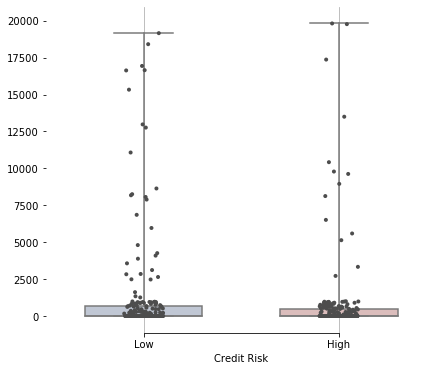

In [41]:
# 通过图形来描述因变量（"Credit Risk"）和自变量（"Checking"）的关系
# 因变量是类别变量（按因变量制作箱线图）
# 自变量是数值变量

# 创建一个图形窗口和坐标轴
f, ax = plt.subplots(figsize=(7, 6))

# 通过箱线图展示因变量（"Credit Risk"）和自变量（"Checking"）的关系
sns.boxplot(x="Credit Risk", y="Checking", data=df,
            whis=[0, 100], width=.6, palette="vlag")

# 添加散点图以展示每个观察值
sns.stripplot(x="Credit Risk", y="Checking", data=df,
              size=4, color=".3", linewidth=0)

# 绘制图形
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

在425名客户中，信用风险低的客户平均checking为1245.9813，信用风险高的客户平均checking为847.2322。	

In [42]:
#分组描述统计——Savings和Credit Risk
np.round(df[['Savings','Credit Risk']].groupby(['Credit Risk']).describe(),4)

Savings                                                          
              count       mean        std  min     25%    50%    75%      max
Credit Risk                                                                  
High          211.0  1487.9573  3015.9991  0.0  305.00  648.0  909.0  19811.0
Low           214.0  2132.6168  4072.3437  0.0  189.75  538.5  944.0  19568.0

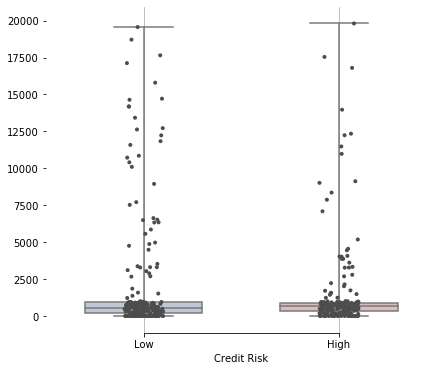

In [43]:
# 通过图形来描述因变量（"Credit Risk"）和自变量（"Savings"）的关系
# 因变量是类别变量（按因变量制作箱线图）
# 自变量是数值变量

# 创建一个图形窗口和坐标轴
f, ax = plt.subplots(figsize=(7, 6))

# 通过箱线图展示因变量（"Credit Risk"）和自变量（"Savings"）的关系
sns.boxplot(x="Credit Risk", y="Savings", data=df,
            whis=[0, 100], width=.6, palette="vlag")

# 添加散点图以展示每个观察值
sns.stripplot(x="Credit Risk", y="Savings", data=df,
              size=4, color=".3", linewidth=0)

# 绘制图形
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

在425名客户中，信用风险低的客户平均Savings为2132.6168，信用风险高的客户平均Savings为1487.9573。

In [44]:
#分组描述统计——Months Customer和Credit Risk
np.round(df[['Months Customer','Credit Risk']].groupby(['Credit Risk']).describe(),4)

Months Customer                                               
                      count     mean      std  min   25%   50%   75%   max
Credit Risk                                                               
High                  211.0  25.6303  12.6738  7.0  15.5  25.0  35.5  73.0
Low                   214.0  20.2009  11.2476  5.0  13.0  17.5  25.0  61.0

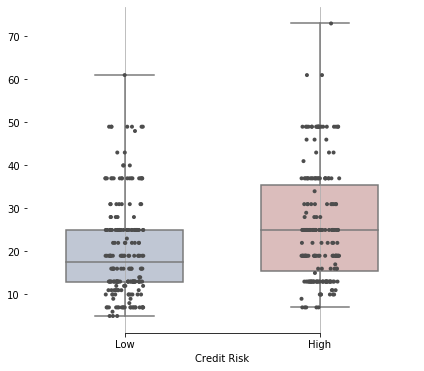

In [45]:
# 通过图形来描述因变量（"Credit Risk"）和自变量（"Months Customer"）的关系
# 因变量是类别变量（按因变量制作箱线图）
# 自变量是数值变量

# 创建一个图形窗口和坐标轴
f, ax = plt.subplots(figsize=(7, 6))

# 通过箱线图展示因变量（"Credit Risk"）和自变量（"Months Customer"）的关系
sns.boxplot(x="Credit Risk", y="Months Customer", data=df,
            whis=[0, 100], width=.6, palette="vlag")

# 添加散点图以展示每个观察值
sns.stripplot(x="Credit Risk", y="Months Customer", data=df,
              size=4, color=".3", linewidth=0)

# 绘制图形
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

在425名客户中，信用风险低的客户平均Months Customer为20.2009，信用风险高的客户平均Months Customer为25.6303。

In [46]:
#分组描述统计——Months Employed和Credit Risk
np.round(df[['Months Employed','Credit Risk']].groupby(['Credit Risk']).describe(),4)

Months Employed                                                
                      count     mean      std  min  25%   50%    75%    max
Credit Risk                                                                
High                  211.0  28.8246  30.8842  0.0  5.0  17.0  43.50  119.0
Low                   214.0  34.9252  33.3556  0.0  9.0  23.0  53.75  119.0

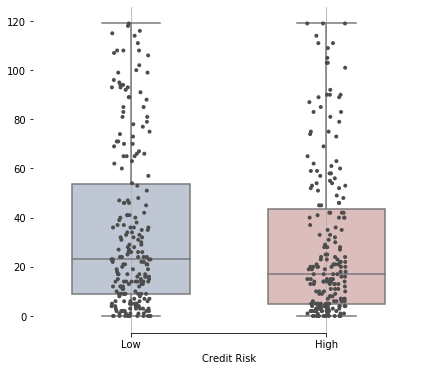

In [47]:
# 通过图形来描述因变量（"Credit Risk"）和自变量（"Months Employed"）的关系
# 因变量是类别变量（按因变量制作箱线图）
# 自变量是数值变量

# 创建一个图形窗口和坐标轴
f, ax = plt.subplots(figsize=(7, 6))

# 通过箱线图展示因变量（"Credit Risk"）和自变量（"Months Employed"）的关系
sns.boxplot(x="Credit Risk", y="Months Employed", data=df,
            whis=[0, 100], width=.6, palette="vlag")

# 添加散点图以展示每个观察值
sns.stripplot(x="Credit Risk", y="Months Employed", data=df,
              size=4, color=".3", linewidth=0)

# 绘制图形
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

在425名客户中，信用风险低的客户平均Months Employed为34.9252，信用风险高的客户平均Months Employed为28.8246。

In [48]:
#分组描述统计——Gender和Credit Risk
np.round(df[['Gender','Credit Risk']].groupby(['Credit Risk']).describe(),4)

Gender                
             count unique top freq
Credit Risk                       
High           211      2   M  133
Low            214      2   M  157

在425名客户中，信用风险低的客户中性别最多的是男性，信用风险高的客户中性别最多的也是男性。

In [49]:
#分组描述统计——Marital Status和Credit Risk
np.round(df[['Marital Status','Credit Risk']].groupby(['Credit Risk']).describe(),4)

Marital Status                    
                     count unique     top freq
Credit Risk                                   
High                   211      3  Single  103
Low                    214      3  Single  130

在425名客户中，信用风险低的客户中单身人数最多，信用风险高的客户中也是单身人数最多。

In [50]:
#分组描述统计——Age和Credit Risk
np.round(df[['Age','Credit Risk']].groupby(['Credit Risk']).describe(),4)

Age                                                
             count     mean      std   min   25%   50%   75%   max
Credit Risk                                                       
High         211.0  33.4502  11.1638  19.0  24.0  31.0  40.5  67.0
Low          214.0  35.3318  10.8722  18.0  27.0  34.0  41.0  73.0

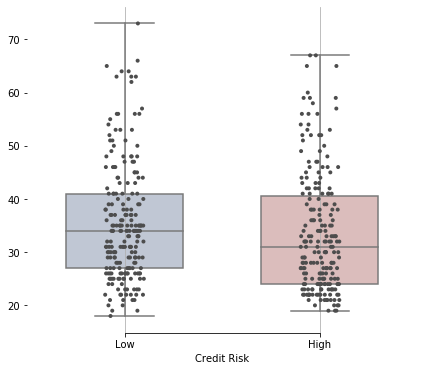

In [51]:
# 通过图形来描述因变量（"Credit Risk"）和自变量（"Age"）的关系
# 因变量是类别变量（按因变量制作箱线图）
# 自变量是数值变量

# 创建一个图形窗口和坐标轴
f, ax = plt.subplots(figsize=(7, 6))

# 通过箱线图展示因变量（"Credit Risk"）和自变量（"Age"）的关系
sns.boxplot(x="Credit Risk", y="Age", data=df,
            whis=[0, 100], width=.6, palette="vlag")

# 添加散点图以展示每个观察值
sns.stripplot(x="Credit Risk", y="Age", data=df,
              size=4, color=".3", linewidth=0)

# 绘制图形
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

在425名客户中，信用风险低的客户平均年龄为35.3318岁，信用风险高的客户平均年龄为33.4502岁。

In [52]:
#分组描述统计——Housing和Credit Risk
np.round(df[['Housing','Credit Risk']].groupby(['Credit Risk']).describe(),4)

Housing                 
              count unique  top freq
Credit Risk                         
High            211      3  Own  131
Low             214      3  Own  161

在425名客户中，信用风险低的客户中有房子的人数最多，信用风险高的客户中也是有房子的人数最多。

In [53]:
#分组描述统计——Years和Credit Risk
np.round(df[['Years','Credit Risk']].groupby(['Credit Risk']).describe(),4)

Years                                         
             count    mean     std  min  25%  50%  75%  max
Credit Risk                                                
High         211.0  2.9005  1.0843  1.0  2.0  3.0  4.0  4.0
Low          214.0  2.7804  1.0892  1.0  2.0  3.0  4.0  4.0

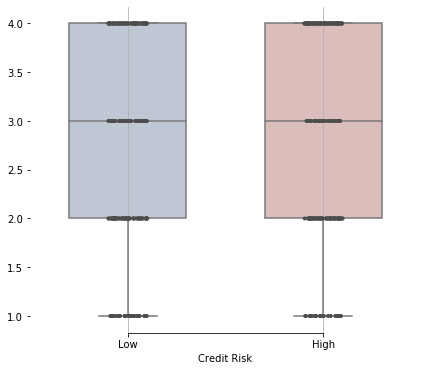

In [54]:
# 通过图形来描述因变量（"Credit Risk"）和自变量（"Years"）的关系
# 因变量是类别变量（按因变量制作箱线图）
# 自变量是数值变量

# 创建一个图形窗口和坐标轴
f, ax = plt.subplots(figsize=(7, 6))

# 通过箱线图展示因变量（"Credit Risk"）和自变量（"Years"）的关系
sns.boxplot(x="Credit Risk", y="Years", data=df,
            whis=[0, 100], width=.6, palette="vlag")

# 添加散点图以展示每个观察值
sns.stripplot(x="Credit Risk", y="Years", data=df,
              size=4, color=".3", linewidth=0)

# 绘制图形
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

在425名客户中，信用风险低的客户平均Years为2.7804，信用风险高的客户平均Years为2.9005。

In [55]:
#分组描述统计——Job和Credit Risk
np.round(df[['Job','Credit Risk']].groupby(['Credit Risk']).describe(),4)

Job                     
            count unique      top freq
Credit Risk                           
High          211      4  Skilled  135
Low           214      4  Skilled  136

在425名客户中，信用风险低的客户中Skilled人数最多，信用风险高的客户中也是Skilled人数最多。

## 建立logistic回归模型并分析结果。<br>

将分类变量转换为虚拟变量：

Credit Risk：Low=0，High=1<br>
Gender：F=0，M=1<br>
Marital Status：Married=0，Single=1，Divorced=2<br>
Housing：Own=0，Other=1，Rent=2<br>
Job：Management=0，Skilled=1，Unskilled=2，Unemployed=3

In [56]:
df = pd.read_csv("E:\yanghu\HW3\credit risk1.csv",sep=',',header=0,encoding='UTF-8')

In [57]:
# 使用Logit模型进行拟合
Logit = sm.Logit(df[['Credit Risk']],df[['Checking','Savings','Months Customer','Months Employed',
                                         'Gender','Marital Status','Age','Housing','Years','Job']]).fit()

# 打印Logit模型的摘要
print(Logit.summary())

# 打印回归系数估计的结果
np.round(Logit.params,100)

Optimization terminated successfully.
         Current function value: 0.642629
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            Credit Risk   No. Observations:                  425
Model:                          Logit   Df Residuals:                      415
Method:                           MLE   Df Model:                            9
Date:                Tue, 24 Oct 2023   Pseudo R-squ.:                 0.07285
Time:                        23:49:21   Log-Likelihood:                -273.12
converged:                       True   LL-Null:                       -294.58
Covariance Type:            nonrobust   LLR p-value:                 2.231e-06
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Checking        -3.801e-05   3.34e-05     -1.139      0.255      -0.000    2.74e-05
Savings       

Checking          -0.000038
Savings           -0.000057
Months Customer    0.039319
Months Employed   -0.004609
Gender            -0.564546
Marital Status    -0.069834
Age               -0.012316
Housing            0.251936
Years              0.054890
Job                0.006913
dtype: float64

Checking的回归系数为-0.000038，Savings的回归系数为-0.000057，Months Customer的回归系数为0.039319，Months Employed的回归系数为-0.004609，Gender的回归系数为-0.564546，Marital Status的回归系数为-0.069834，Age的回归系数为-0.012316，Housing的回归系数为0.251936，Years的回归系数为0.054890，Job的回归系数为0.006913。

## 计算OR值及其置信区间

In [58]:
#计算OR及其置信区间
model_odds = pd.DataFrame(np.exp(Logit.params), columns= ['OR'])
model_odds['p-value']= Logit.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(Logit.conf_int())

np.round(model_odds,200)

,OR,p-value,2.5%,97.5%
Checking,0.999962,0.254534,0.999897,1.000027
Savings,0.999943,0.059198,0.999884,1.000002
Months Customer,1.040102,0.000014,1.021786,1.058746
Months Employed,0.995401,0.199278,0.988420,1.002432
Gender,0.568618,0.054540,0.319791,1.011055
Marital Status,0.932548,0.730699,0.626571,1.387945
Age,0.987759,0.217447,0.968615,1.007282
Housing,1.286513,0.068827,0.980746,1.687609
Years,1.056424,0.595237,0.862765,1.293554
Job,1.006937,0.967265,0.723782,1.400868


OR列显示了每个自变量的Odds Ratio。从表中可知，客户Checking、Savings、Months Employed、Gender、Marital Status、Age的OR值均小于1，这表示这六个因素的增加会对“信用风险水平”产生负面影响；反之，其余因素为正向影响，例如Years每变化1个单位，客户信用风险的几率将增加1.056424倍。同时，客户Months Customer的p-value远小于显著性水平0.05，进一步表明其对事件信用风险高发生的几率有显著影响。

## 进行似然比检验，评估模型拟合效果。

In [59]:
#原假设模型的对数似然值
print("LR of H0:%.4f" %Logit.llnull)

#备择假设模型的对数似然值
print("LR of H1:%.4f"%Logit.llf)

#似然比
LR = -2 * (Logit.llnull -  Logit.llf)
print("LR:%.4f"%LR)

# 设置似然比检验的临界值和计算p值
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print("P:%.4f"%stats.chisqprob(LR, 3))

LR of H0:-294.5770
LR of H1:-273.1174
LR:42.9191
P:0.0000


可见，原假设模型的对数似然值小于备择假设模型的对数似然值，证明模型拟合效果较好；而似然比检验的p值远小于0.05，说明全模型显著存在。